## Missão: Analisar o Comportamento de Compra de Consumidores.

## Nível de Dificuldade: Alto

In [1]:
# Imports
import pandas as pd
import numpy as np

In [2]:
# Carrega o arquivo
load_file = "dados_compras.json"
purchase_file = pd.read_json(load_file, orient = "records")
purchase_file.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


In [3]:
#limpeza de duplicatas
purchase_file = purchase_file.drop_duplicates()

## Informações Sobre os Consumidores

In [4]:
#número totl de consumidores
purchase_file['Login'].nunique()

573

## Análise Geral de Compras

In [5]:
#Número de itens exclusivos
purchase_file['Item ID'].nunique()

183

In [6]:
#Preço médio de compra
round(purchase_file['Valor'].mean(),2)

2.93

In [7]:
#Número total de compras
purchase_file['Item ID'].count()

777

In [8]:
#Rendimento total
purchase_file['Valor'].sum()

2279.32

## Análise Demográfica

<AxesSubplot:xlabel='Idade'>

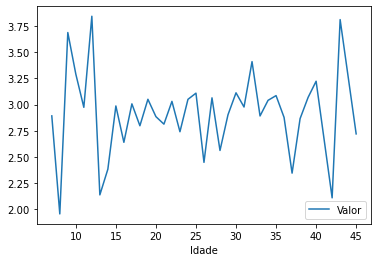

In [9]:
#gráfico da idade dos conimdores e valor gasto
purchase_file.groupby('Idade').agg({'Valor':'mean'}).plot.line()

## Informações Demográficas Por Gênero

In [10]:
#Porcentagem e contagem de compradores masculinos
genreM = purchase_file.where(purchase_file["Sexo"] == "Masculino")
countM = genreM['Login'].nunique()
percM= genreM['Login'].nunique()/purchase_file['Login'].nunique()

print(f'A porcentagem de compradores é {(percM)*100:.2f}%.')
print(f'A contagem de compradores é',(countM))

A porcentagem de compradores é 81.15%.
A contagem de compradores é 465


In [14]:
#Porcentagem e contagem de compradores do sexo feminino
genreF = purchase_file.where(purchase_file["Sexo"] == "Feminino")
countF = genreF['Login'].nunique()
percF= genreF['Login'].nunique()/purchase_file['Login'].nunique()

print(f'A porcentagem de compradoras é {(percF)*100:.2f}%.')
print(f'A contagem de compradoras é',(countF))

A porcentagem de compradoras é 17.45%.
A contagem de compradoras é 100


In [12]:
#Porcentagem e contagem de outros / não divulgados
genreNA = purchase_file.where(purchase_file["Sexo"] == 'Outro / Não Divulgado')
countNA = genreNA['Login'].nunique()
percNA= genreNA['Login'].nunique()/purchase_file['Login'].nunique()

print(f'A porcentagem de compradores de sexo indefinido é {(percNA)*100:.2f}%.')
print(f'A contagem de compradores de sexo indefinido é',(countNA))

A porcentagem de compradores de sexo indefinido é 1.40%.
A contagem de compradores de sexo indefinido é 8


## Análise de Compras Por Gênero

In [15]:
purchase_file.groupby('Sexo').agg({'Idade': 'mean','Valor':'mean','Item ID':'count'})

,Idade,Valor,Item ID
Sexo,,,
Feminino,22.540741,2.826296,135
Masculino,22.713154,2.950919,631
Outro / Não Divulgado,27.363636,3.249091,11


In [16]:
#mudando idade para faixa etária
def checkAgeRange(age):
    las_dig=age%10
    range_age=str.format('{0}-{1}',age-las_dig,((age-las_dig)+10))
    return range_age

dataFrame= purchase_file
dataFrame['FaixaEtaria']=purchase_file['Idade'].apply(checkAgeRange)


In [17]:
#compras por faixa etaria
purchase_file.groupby('FaixaEtaria').agg({'Idade': 'mean','Valor':'sum','Item ID':'count'})

,Idade,Valor,Item ID
FaixaEtaria,,,
0-10,7.555556,80.04,27
10-20,15.702381,483.37,168
20-30,23.047930,1345.51,459
30-40,33.632075,316.65,106
40-50,40.588235,53.75,17


## Consumidores Mais Populares (Top 5)

In [18]:
# Implemente aqui sua solução
customer = purchase_file.groupby('Login').agg({'Valor':'sum'})
customer.sort_values(by='Valor',ascending=False).head(5)

,Valor
Login,
Undirrala66,17.06
Saedue76,13.56
Mindimnya67,12.74
Haellysu29,12.73
Eoda93,11.58


In [19]:
#Número de compras
top5c = ['Undirrala66','Saedue76','Mindimnya67','Haellysu29','Eoda93']
purch_top5 = purchase_file[purchase_file.Login.isin(top5c)]
purch_top5.groupby('Login').agg({'Login':'count'})

,Login
Login,
Eoda93,3
Haellysu29,3
Mindimnya67,4
Saedue76,4
Undirrala66,5


In [20]:
#Preço médio de compra
purch_top5.groupby('Login').agg({'Valor':'mean'})

,Valor
Login,
Eoda93,3.860000
Haellysu29,4.243333
Mindimnya67,3.185000
Saedue76,3.390000
Undirrala66,3.412000


In [21]:
#Valor Total de Compra 
purch_top5.groupby('Login').agg({'Valor':'sum'})

,Valor
Login,
Eoda93,11.58
Haellysu29,12.73
Mindimnya67,12.74
Saedue76,13.56
Undirrala66,17.06


In [22]:
#Itens mais populares entre os 5 maiores compradores
purch_top5.groupby('Nome do Item').agg({'Nome do Item':'count'})

,Nome do Item
Nome do Item,
Blood Infused Guardian,1
Blood-Forged Skeletal Spine,1
Celeste,1
Devine,1
Faith's Scimitar,1
Fiery Glass Crusader,1
Haunted Bronzed Bludgeon,1
Heartless Bone Dualblade,1
Piece Maker,1


## Itens Mais Populares

In [23]:
# Identifique os 5 itens mais populares por contagem de compras
product= purchase_file['Nome do Item'].value_counts().head()

In [24]:
#Preço do item
top5p = ['Final Critic','Betrayal, Whisper of Grieving Widows','Arcane Gem','Stormcaller','Woeful Adamantite Claymore']
prod_top5 = purchase_file[purchase_file['Nome do Item'].isin(top5p)]
prod_top5.groupby(['Nome do Item']).mean()["Valor"]

Nome do Item
Arcane Gem                              2.230000
Betrayal, Whisper of Grieving Widows    2.350000
Final Critic                            2.864615
Stormcaller                             3.465000
Woeful Adamantite Claymore              1.240000
Name: Valor, dtype: float64

## Itens Mais Lucrativos

In [25]:
# Implemente aqui sua solução
purchase_file.groupby('Nome do Item').agg({'Valor':'sum'}).sort_values(by = "Valor", ascending = False)


,Valor
Nome do Item,
Retribution Axe,37.26
Final Critic,37.24
Stormcaller,34.65
Spectral Diamond Doomblade,29.75
Orenmir,29.70
...,...
Exiled Doomblade,1.92
Splinter,1.82
Phantomlight,1.79


## Fim